## Data Cleaning

In [28]:
import utils.loader as data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os


In [29]:
benefits_df = data.BENEFITS

In [30]:
from utils.loader import EMPLOYEES_BENEFITS_USAGE
df = EMPLOYEES_BENEFITS_USAGE

In [31]:
# Remove duplicate rows in the main dataframe
df.drop_duplicates(inplace=True)

# (Optional) Reset index after dropping duplicates
df.reset_index(drop=True, inplace=True)

# Preview the result
df.head()

,EmployeeID,Age,Gender,Department,Tenure,BenefitID,UsageFrequency,LastUsedDate,BenefitType,BenefitSubType,BenefitCost
0,1,62,Male,IT,8,9,5,2023-08-27,Professional Development,Conference Attendance,850.00
1,1,62,Male,IT,8,17,3,2024-07-02,Retirement Plan,401k Catch-Up Contributions,509.65
2,1,62,Male,IT,8,16,5,2023-09-16,Health Insurance,HDHP Individual,84.55
3,1,62,Male,IT,8,13,0,2024-04-16,Cell Phone Allowance,Monthly Communications,65.00
4,1,62,Male,IT,8,26,0,2024-03-27,Gym Membership,Family Membership,519.66


In [32]:
df.shape

(49998, 11)

In [33]:
# convert LastUsedDate in the main dataframe to datetime
df['LastUsedDate'] = pd.to_datetime(df['LastUsedDate'])

# verify the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   EmployeeID      49998 non-null  int64         
 1   Age             49998 non-null  int64         
 2   Gender          49998 non-null  object        
 3   Department      49998 non-null  object        
 4   Tenure          49998 non-null  int64         
 5   BenefitID       49998 non-null  int64         
 6   UsageFrequency  49998 non-null  int64         
 7   LastUsedDate    49998 non-null  datetime64[ns]
 8   BenefitType     49998 non-null  object        
 9   BenefitSubType  49998 non-null  object        
 10  BenefitCost     49998 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 4.2+ MB


In [34]:
# Identify any negative UsageFrequency values in the main dataframe
neg_usage = df[df['UsageFrequency'] < 0]

if neg_usage.empty:
    print("No negative values found in UsageFrequency.")
else:
    print(f"Found {len(neg_usage)} rows with negative UsageFrequency:")
    display(neg_usage)

No negative values found in UsageFrequency.


In [35]:
# Check for missing values in each column of the main dataframe
df.isnull().sum()

EmployeeID        0
Age               0
Gender            0
Department        0
Tenure            0
BenefitID         0
UsageFrequency    0
LastUsedDate      0
BenefitType       0
BenefitSubType    0
BenefitCost       0
dtype: int64

Benefit Type: Professional Development
Benefit SubType: Conference Attendance


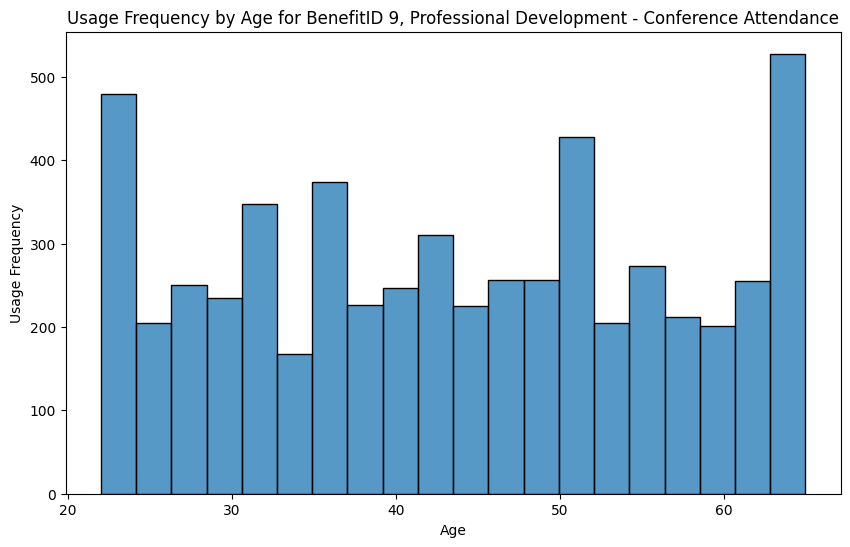

In [36]:
# specify the benefit you want to plot
benefit_id = 9  # change this to the BenefitID you’re interested in

# display benefit type and subtype
info = data.BENEFITS.loc[data.BENEFITS['BenefitID'] == benefit_id, ['BenefitType', 'BenefitSubType']].iloc[0]
print(f"Benefit Type: {info['BenefitType']}")
print(f"Benefit SubType: {info['BenefitSubType']}")
benefit_id = 9  # change this to the BenefitID you’re interested in

# filter the main dataframe for that benefit
subset = df[df['BenefitID'] == benefit_id]

# plot a histogram of age weighted by usage frequency
plt.figure(figsize=(10, 6))
sns.histplot(data=subset,
             x='Age',
             weights='UsageFrequency',
             bins=20,
             kde=False)

plt.title(f'Usage Frequency by Age for BenefitID {benefit_id}, {info["BenefitType"]} - {info["BenefitSubType"]}')
plt.xlabel('Age')
plt.ylabel('Usage Frequency')
plt.show()

In [37]:
# display all unique BenefitIDs in the notebook
unique_benefit_ids = benefits_df['BenefitID'].unique()
print(sorted(unique_benefit_ids))

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30)]


In [38]:
# Create an age group column
bins = [17, 25, 41, 57, float('inf')]
labels = ['Gen-z', 'Millennial', 'Gen-X', 'Boomer']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Verify
df[['Age', 'AgeGroup']].head()

,Age,AgeGroup
0,62,Boomer
1,62,Boomer
2,62,Boomer
3,62,Boomer
4,62,Boomer


In [39]:
conditions = [
    df['Tenure'] < 5,
    (df['Tenure'] >= 5) & (df['Tenure'] <= 15),
    df['Tenure'] > 15
]
choices = ['short', 'medium', 'long']
df['TenureType'] = np.select(conditions, choices)

# Verify new column
df[['Tenure', 'TenureType']].head()

TypeError: Choicelist and default value do not have a common dtype: The DType <class 'numpy.dtypes._PyLongDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyLongDType'>)

In [ ]:
df

,EmployeeID,Age,Gender,Department,Tenure,BenefitID,UsageFrequency,LastUsedDate,BenefitType,BenefitSubType,BenefitCost,AgeGroup,TenureType
0,1,62,Male,IT,8,9,5,2023-08-27,Professional Development,Conference Attendance,850.00,Boomer,medium
1,1,62,Male,IT,8,17,3,2024-07-02,Retirement Plan,401k Catch-Up Contributions,509.65,Boomer,medium
2,1,62,Male,IT,8,16,5,2023-09-16,Health Insurance,HDHP Individual,84.55,Boomer,medium
3,1,62,Male,IT,8,13,0,2024-04-16,Cell Phone Allowance,Monthly Communications,65.00,Boomer,medium
4,1,62,Male,IT,8,26,0,2024-03-27,Gym Membership,Family Membership,519.66,Boomer,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,5000,63,Male,Sales,32,14,7,2024-04-10,Gym Membership,Tier 1 Partners,73.36,Boomer,long
49994,5000,63,Male,Sales,32,5,3,2024-07-07,Technology Stipend,Monthly Internet Allowance,75.00,Boomer,long
49995,5000,63,Male,Sales,32,29,0,2024-04-26,Childcare,After-School Care,475.00,Boomer,long
49996,5000,63,Male,Sales,32,26,5,2024-05-25,Gym Membership,Family Membership,519.66,Boomer,long


In [ ]:
counts = df['AgeGroup'].value_counts().reindex(labels)
print(counts)

AgeGroup
Gen-z          4796
Millennial    17959
Gen-X         17959
Boomer         9284
Name: count, dtype: int64


In [ ]:
# Count unique employees in each tenure category
tenure_counts = df.groupby('TenureType')['EmployeeID'].nunique().reindex(choices)
print(tenure_counts)

TenureType
short     1203
medium    2110
long      1687
Name: EmployeeID, dtype: int64


In [ ]:
df.to_csv('phase1_cleaned_data.csv', index=False)

## Encoding

In [ ]:
# ensure LastUsedDate is datetime
df['LastUsedDate'] = pd.to_datetime(df['LastUsedDate'])

# one-hot encode specified categorical columns
cols_to_encode = ['Gender', 'Department', 'AgeGroup', 'TenureType']
df = pd.get_dummies(df, columns=cols_to_encode)

# preview the transformed dataframe
df.head()

,EmployeeID,Age,Tenure,BenefitID,UsageFrequency,LastUsedDate,BenefitType,BenefitSubType,BenefitCost,Gender_Female,...,Department_IT,Department_Marketing,Department_Sales,AgeGroup_Gen-z,AgeGroup_Millennial,AgeGroup_Gen-X,AgeGroup_Boomer,TenureType_long,TenureType_medium,TenureType_short
0,1,62,8,9,5,2023-08-27,Professional Development,Conference Attendance,850.00,False,...,True,False,False,False,False,False,True,False,True,False
1,1,62,8,17,3,2024-07-02,Retirement Plan,401k Catch-Up Contributions,509.65,False,...,True,False,False,False,False,False,True,False,True,False
2,1,62,8,16,5,2023-09-16,Health Insurance,HDHP Individual,84.55,False,...,True,False,False,False,False,False,True,False,True,False
3,1,62,8,13,0,2024-04-16,Cell Phone Allowance,Monthly Communications,65.00,False,...,True,False,False,False,False,False,True,False,True,False
4,1,62,8,26,0,2024-03-27,Gym Membership,Family Membership,519.66,False,...,True,False,False,False,False,False,True,False,True,False


In [ ]:
# One-hot encode the BenefitID column
df = pd.get_dummies(df, columns=['BenefitID'], prefix='BenefitID')

# Preview the result
df.head()

,EmployeeID,Age,Tenure,UsageFrequency,LastUsedDate,BenefitType,BenefitSubType,BenefitCost,Gender_Female,Gender_Male,...,BenefitID_21,BenefitID_22,BenefitID_23,BenefitID_24,BenefitID_25,BenefitID_26,BenefitID_27,BenefitID_28,BenefitID_29,BenefitID_30
0,1,62,8,5,2023-08-27,Professional Development,Conference Attendance,850.00,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1,62,8,3,2024-07-02,Retirement Plan,401k Catch-Up Contributions,509.65,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1,62,8,5,2023-09-16,Health Insurance,HDHP Individual,84.55,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1,62,8,0,2024-04-16,Cell Phone Allowance,Monthly Communications,65.00,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1,62,8,0,2024-03-27,Gym Membership,Family Membership,519.66,False,True,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df.to_csv('encoded_phase1_cleaned_data.csv', index=False)